In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("~/Documents/DataScience/data/netflix_data.csv")

In [136]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [31]:
#What type of content is available in different countries?
content_by_country = df.groupby(['country','type']).size().reset_index(name='count')
content_by_country = content_by_country.sort_values(by=['count','country'],ascending= False)



In [32]:
content_by_country

,country,type,count
685,United States,Movie,2058
284,India,Movie,893
686,United States,TV Show,760
581,United Kingdom,TV Show,213
580,United Kingdom,Movie,206
...,...,...,...
7,"Argentina, France",Movie,1
6,"Argentina, Chile, Peru",Movie,1
4,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
1,", South Korea",TV Show,1


In [79]:
pivot_data = content_by_country.pivot(index='country', columns='type', values='count').fillna(0)
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by=['Total'],ascending=False).head(15)
pivot_data = pivot_data.drop('Total',axis=1)

In [80]:
pivot_data

type,Movie,TV Show
country,,
United States,2058.0,760.0
India,893.0,79.0
United Kingdom,206.0,213.0
Japan,76.0,169.0
South Korea,41.0,158.0
Canada,122.0,59.0
Spain,97.0,48.0
France,75.0,49.0
Mexico,70.0,40.0


<Figure size 1200x800 with 0 Axes>

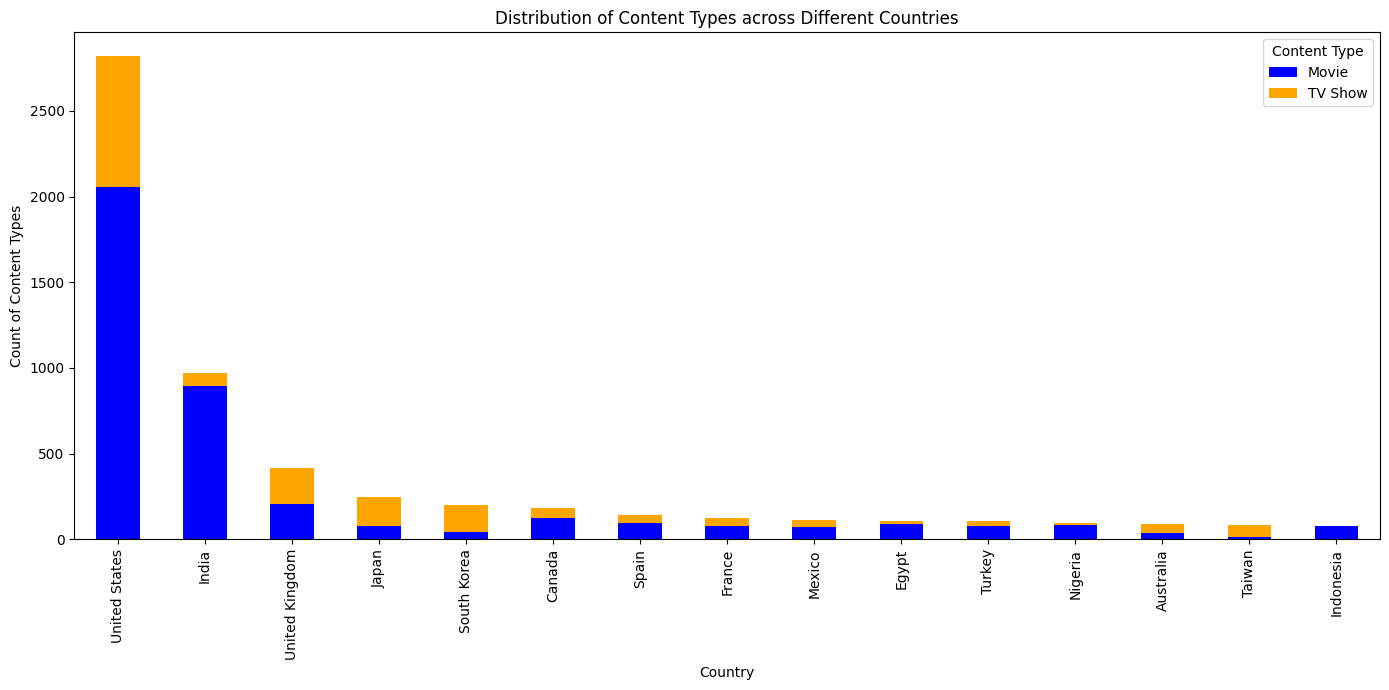

In [81]:
# Plotting
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(14, 7))
plt.title('Distribution of Content Types across Different Countries')
plt.xlabel('Country')
plt.ylabel('Count of Content Types')
plt.xticks(rotation=90)
plt.legend(title='Content Type')
plt.tight_layout()

# Display the plot
plt.show()

In [82]:
#How has the number of movies released per year changed over the last 20-30 years?

movies = df[df['type'] == 'Movie']

In [83]:
movies_per_year = movies['release_year'].value_counts().sort_index()

In [84]:
movies_per_year

release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: count, Length: 73, dtype: int64

In [85]:
movies_per_year.index.max() - 30

np.int64(1991)

In [86]:
movies_per_year.index.min()

np.int64(1942)

In [108]:
last_30_years = movies_per_year[(movies_per_year.index >= (movies_per_year.index.max() - 30)) & (movies_per_year.index <= movies_per_year.index.max())]


In [109]:
last_30_years

release_year
1991     16
1992     20
1993     24
1994     20
1995     23
1996     21
1997     34
1998     32
1999     32
2000     33
2001     40
2002     44
2003     51
2004     55
2005     67
2006     82
2007     74
2008    113
2009    118
2010    154
2011    145
2012    173
2013    225
2014    264
2015    398
2016    658
2017    767
2018    767
2019    633
2020    517
2021    277
Name: count, dtype: int64

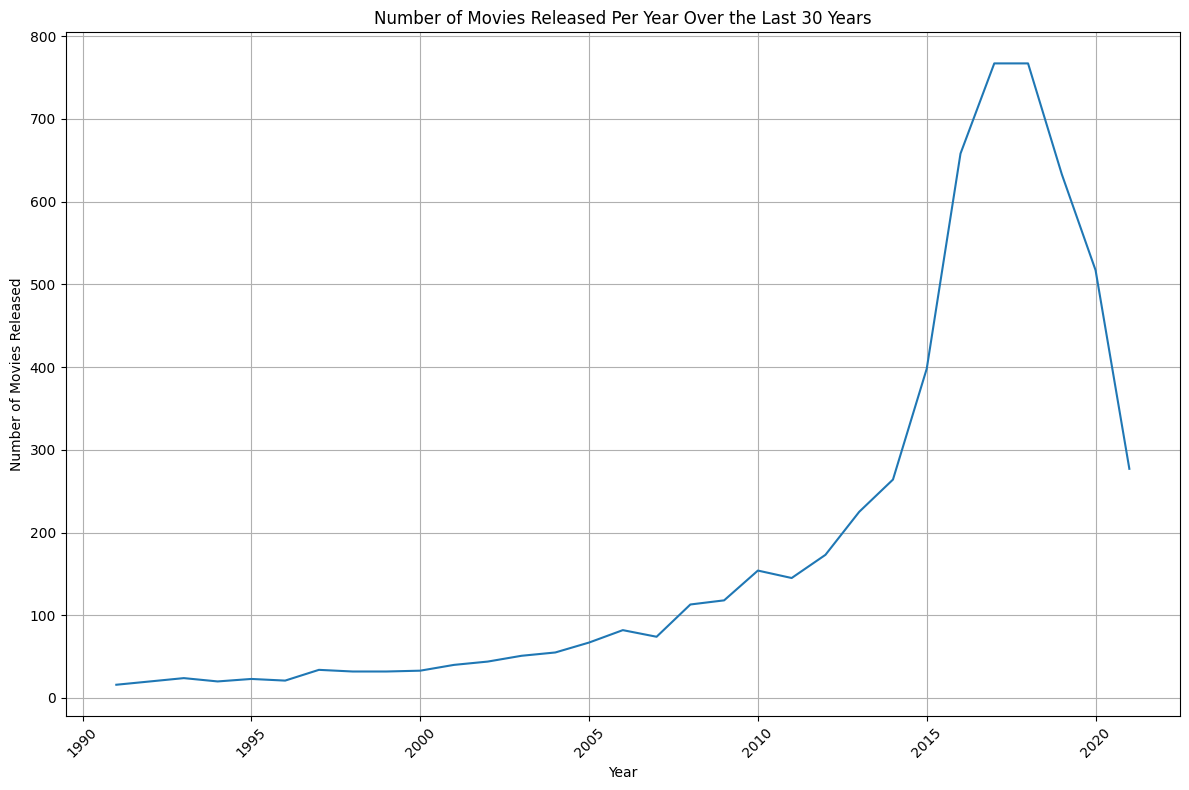

In [110]:
# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=last_30_years, markers=True)
plt.title('Number of Movies Released Per Year Over the Last 30 Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [106]:
#Comparison of tv shows vs. movies.
type_counts = df['type'].value_counts()

In [91]:
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

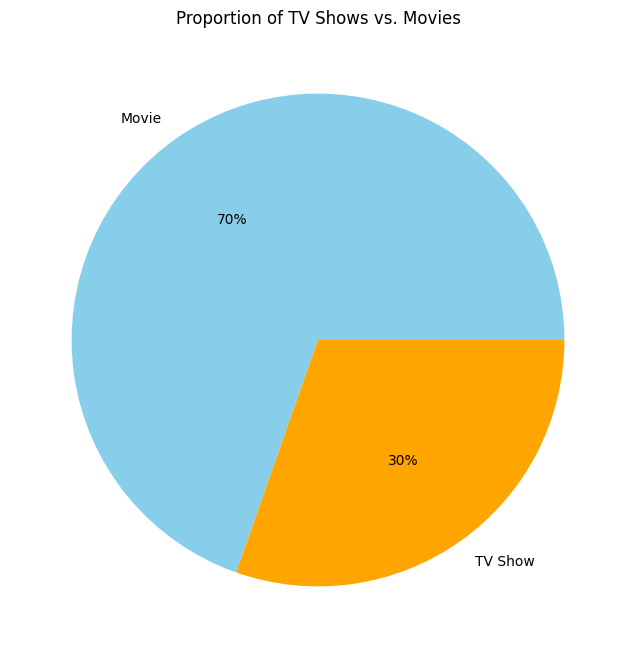

In [97]:
# Pie chart to show the proportion of TV Shows vs Movies
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.0f%%', startangle=0, colors=['skyblue', 'orange'])
plt.title('Proportion of TV Shows vs. Movies')
plt.show()

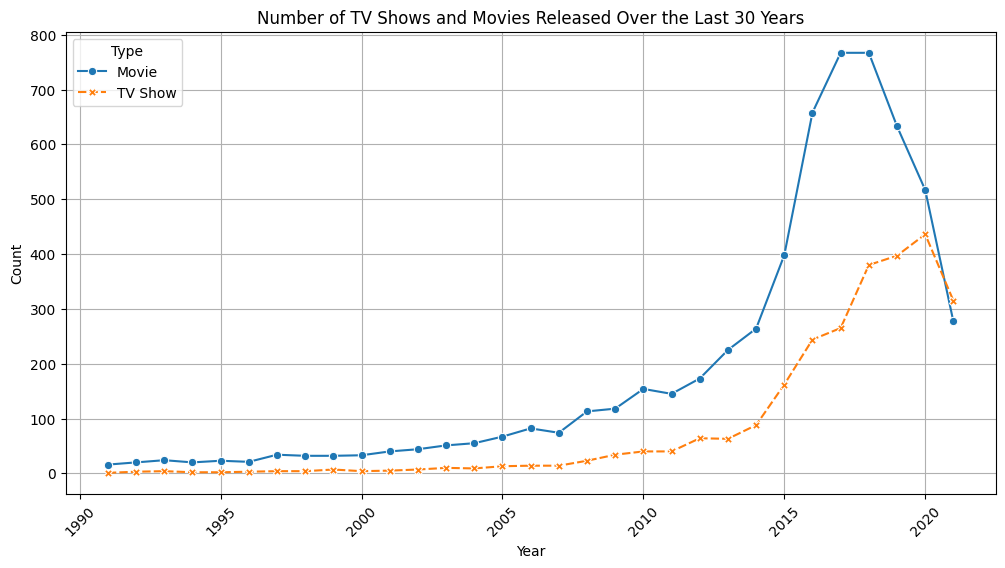

In [117]:
# Group by year and type, then count occurrences
yearly_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Filter data for the last 30 years, for better visibility
last_30_years1 = yearly_counts.loc[yearly_counts.index.max()-30:yearly_counts.index.max()]

# Line plot for trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=last_30_years1, markers=True)
plt.title('Number of TV Shows and Movies Released Over the Last 30 Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

In [115]:
yearly_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

In [116]:
yearly_counts

type,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,1.0
...,...,...
2017,767.0,265.0
2018,767.0,380.0
2019,633.0,397.0


In [118]:
last_30_years1 = yearly_counts.loc[yearly_counts.index.max()-30:yearly_counts.index.max()]

In [119]:
last_30_years1

type,Movie,TV Show
release_year,,
1991,16.0,1.0
1992,20.0,3.0
1993,24.0,4.0
1994,20.0,2.0
1995,23.0,2.0
1996,21.0,3.0
1997,34.0,4.0
1998,32.0,4.0
1999,32.0,7.0


In [124]:
# What is the best time to launch a TV show?
tv = df[df['type'] == 'TV Show'][['title','date_added']]

In [125]:
tv

,title,date_added
1,Blood & Water,"September 24, 2021"
2,Ganglands,"September 24, 2021"
3,Jailbirds New Orleans,"September 24, 2021"
4,Kota Factory,"September 24, 2021"
5,Midnight Mass,"September 24, 2021"
...,...,...
8795,Yu-Gi-Oh! Arc-V,"May 1, 2018"
8796,Yunus Emre,"January 17, 2017"
8797,Zak Storm,"September 13, 2018"
8800,Zindagi Gulzar Hai,"December 15, 2016"


In [129]:
tv['date_added'] = pd.to_datetime(tv['date_added'],format='mixed')
tv['month'] = tv['date_added'].dt.month

In [130]:
tv

,title,date_added,month
1,Blood & Water,2021-09-24,9.0
2,Ganglands,2021-09-24,9.0
3,Jailbirds New Orleans,2021-09-24,9.0
4,Kota Factory,2021-09-24,9.0
5,Midnight Mass,2021-09-24,9.0
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2018-05-01,5.0
8796,Yunus Emre,2017-01-17,1.0
8797,Zak Storm,2018-09-13,9.0
8800,Zindagi Gulzar Hai,2016-12-15,12.0


In [131]:
monthly = tv['month'].value_counts().sort_index()

In [132]:
monthly

month
1.0     192
2.0     181
3.0     213
4.0     214
5.0     193
6.0     236
7.0     262
8.0     236
9.0     251
10.0    215
11.0    207
12.0    266
Name: count, dtype: int64

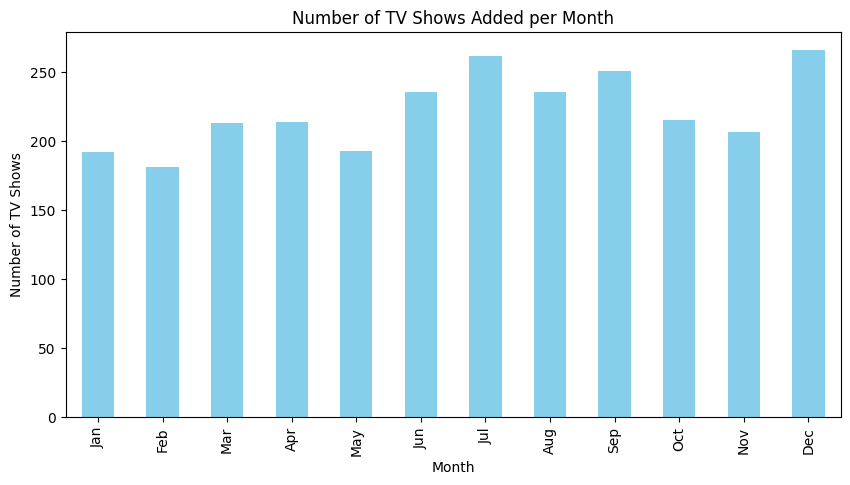

In [135]:
plt.figure(figsize=(10, 5))
monthly.plot(kind='bar', color='skyblue')
plt.title('Number of TV Shows Added per Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
plt.show()

In [137]:
# Analysis of actors/directors of different types of shows/movies.

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [142]:
actors = df['cast'].dropna()


In [146]:
actors = actors.str.split(', ').explode().value_counts()

In [147]:
actors


cast
Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: count, Length: 36439, dtype: int64

In [149]:
# Get the top 10 actors
top_10_actors = actors.head(10)
print(top_10_actors)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


In [163]:
# Content Ratings by Genre

data = df.dropna(subset=['listed_in', 'rating'])

In [164]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [165]:
data['genre'] = data['listed_in'].str.split(', ')
data = data.explode('genre')

/var/folders/dr/87mzsy8d6yx6_0x44s1ngnzr0000gr/T/ipykernel_43461/614864253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['listed_in'].str.split(', ')


In [166]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International Movies


In [174]:
genre_rating_counts = data.groupby(['rating', 'genre']).size().unstack().fillna(0)

# Add a total column to sort by
genre_rating_counts['Total'] = genre_rating_counts.sum(axis=1)
genre_rating_counts = genre_rating_counts.sort_values(by='Total', ascending=False).drop('Total', axis=1)

In [175]:
genre_rating_counts

genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
rating,,,,,,,,,,,,,,,,,,,,,
TV-MA,201.0,15.0,59.0,108.0,1.0,9.0,11.0,431.0,350.0,5.0,...,90.0,269.0,434.0,57.0,65.0,21.0,5.0,39.0,20.0,240.0
TV-14,213.0,23.0,71.0,46.0,18.0,10.0,23.0,465.0,111.0,7.0,...,44.0,140.0,269.0,17.0,31.0,41.0,8.0,11.0,32.0,119.0
TV-PG,33.0,19.0,17.0,55.0,85.0,6.0,11.0,153.0,4.0,2.0,...,17.0,60.0,49.0,1.0,1.0,9.0,0.0,2.0,15.0,5.0
R,220.0,0.0,0.0,0.0,0.0,0.0,32.0,180.0,0.0,37.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,153.0
PG-13,148.0,4.0,0.0,0.0,11.0,0.0,10.0,168.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
PG,32.0,5.0,0.0,0.0,195.0,0.0,17.0,148.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
TV-Y7,0.0,4.0,26.0,5.0,129.0,1.0,0.0,47.0,3.0,0.0,...,14.0,54.0,0.0,0.0,0.0,9.0,0.0,2.0,0.0,0.0
TV-G,0.0,1.0,0.0,17.0,51.0,1.0,1.0,29.0,1.0,0.0,...,1.0,28.0,9.0,0.0,1.0,1.0,2.0,1.0,2.0,0.0
TV-Y,0.0,0.0,2.0,20.0,113.0,1.0,0.0,21.0,0.0,0.0,...,0.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


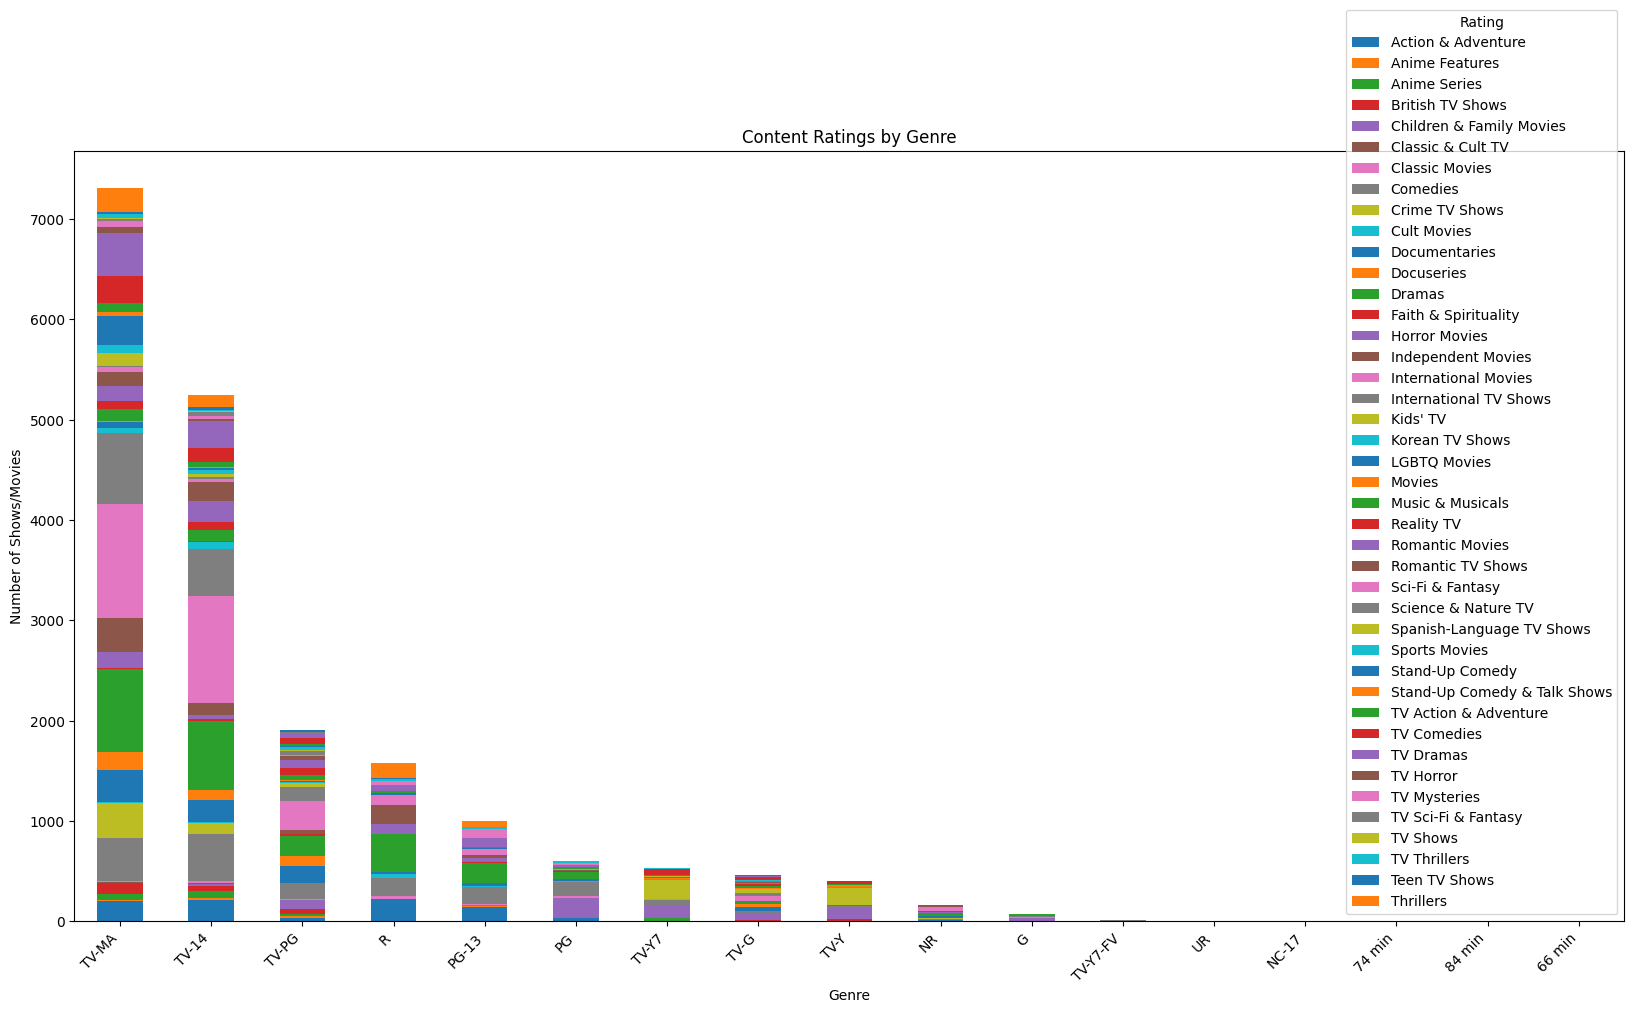

In [176]:
# Plotting the count of ratings by genre
genre_rating_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Content Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Shows/Movies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.show()

In [ ]:
# Understanding what content is available in different countries.

